In [11]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import jax.numpy as jnp


In [9]:
census = np.load('program_databases/07-23/00-21-26 (image)/combined/census.npy', allow_pickle=True)
y_eval = census[:, -1]
n_programs = census.shape[0]

In [16]:
y_eval[0].shape

(1055, 100)

Evaluating outputs for cell index: 1


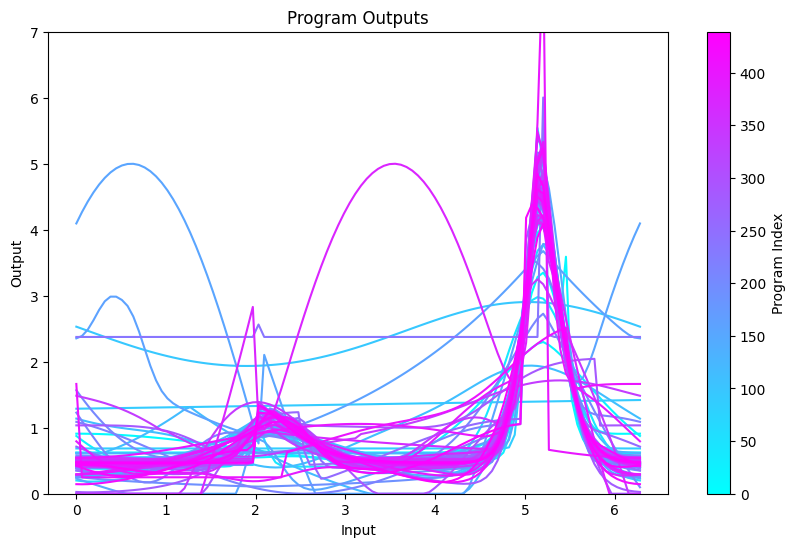

In [92]:
cell_index = 1
print(f"Evaluating outputs for cell index: {cell_index}")
x = np.linspace(0, 2*np.pi, 100)
# add a colormap that we will use to indicate different programs
cmap = plt.get_cmap('cool', n_programs)

plt.figure(figsize=(10, 6))
for i in range(0, n_programs, 5):
    y = y_eval[i][cell_index, :]
    plt.plot(x, y, color=cmap(i))
plt.title('Program Outputs')
plt.xlabel('Input')
plt.ylabel('Output')
# Create a scatter plot to have a mappable for the colorbar
scatter = plt.scatter([], [], c=[], cmap='cool', vmin=0, vmax=n_programs-1)
plt.colorbar(scatter, label='Program Index')
plt.ylim(0, 7)
plt.show()


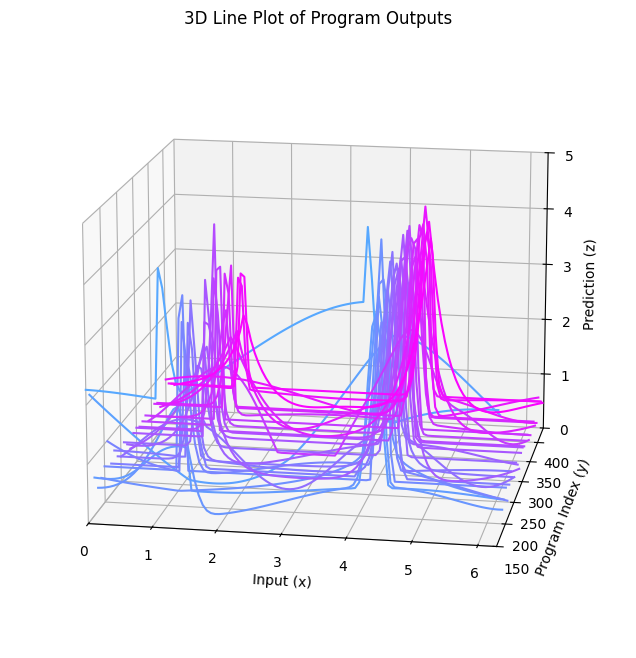

In [91]:
from mpl_toolkits.mplot3d import Axes3D

cell_index = 14
x = np.linspace(0, 2*np.pi, 100)
y = np.arange(n_programs - 150)
X, Y = np.meshgrid(x, y)
Z = np.array([y_eval[i][cell_index, :] for i in range(150, n_programs)])
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot a line for each program with depth shading
for i in range(0, Z.shape[0], 10):
    ax.plot(x, np.full_like(x, i + 150), Z[i], color=cmap(i + 150), label=f'Program {i + 150}')
ax.set_title('3D Line Plot of Program Outputs')
ax.set_xlabel('Input (x)')
ax.set_ylabel('Program Index (y)')
ax.set_zlabel('Prediction (z)')
ax.set_ylim3d(150, n_programs - 1)
ax.set_xlim3d(0, 2 * np.pi)
ax.set_zlim3d(0, 5)
# change view angle
ax.view_init(elev=15, azim=280)
plt.show()
